In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [48]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    gdp_per_capita.rename(columns={"2018": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index('Entity', inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[['GDP per capita', 'Life satisfaction']]

In [49]:
oecd_bli = pd.read_csv(r'.\datasets\chapter_1\oecd_bli.csv', header=0, thousands = ',')
gdp_per_capita = pd.read_csv(r'.\datasets\chapter_1\2018_per_capita_gdp.csv', thousands=',', na_values='n/a')

In [50]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [51]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats['Life satisfaction']]

<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

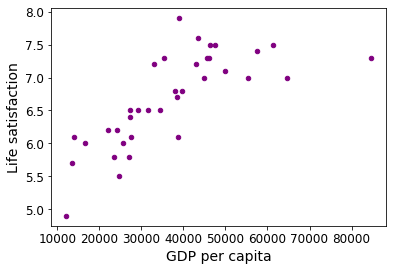

In [54]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', color='purple')

In [59]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

X_new = [[2220.176514]] # Benin's GDP per capita

In [56]:
print(model.predict(X_new))

[[5.50499205]]


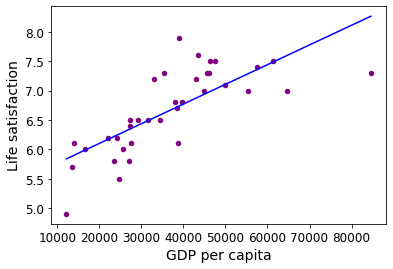

In [60]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', color='purple')
plt.plot(X, model.predict(X), color='blue')

In [57]:
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

model1.fit(X, y)
print(model1.predict(X_new))

[[5.56666667]]
